In [ ]:
import pandas as pd

df = pd.read_csv("stress_detection.csv")

#basic dataset details
print("=== Dataset Overview ===")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns (features): {df.shape[1]}")
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#check missing vals
print("Are there any missing values in the dataset: ", df.isnull().any().any())

#stat summary of columns
print("\nStatistical summary of numeric columns:")
print(df.describe())

#show head
print("\nFirst 5 rows of the dataset:")
display(df.head())

=== Dataset Overview ===
Number of rows: 3000
Number of columns (features): 20

Number of duplicate rows: 0
Are there any missing values in the dataset:  False

Statistical summary of numeric columns:
       participant_id          day    PSS_score     Openness  \
count     3000.000000  3000.000000  3000.000000  3000.000000   
mean        50.500000    15.500000    24.701000     3.020663   
std         28.870882     8.656884     8.615781     1.159310   
min          1.000000     1.000000    10.000000     1.005003   
25%         25.750000     8.000000    17.000000     2.024510   
50%         50.500000    15.500000    25.000000     3.050115   
75%         75.250000    23.000000    32.000000     4.029171   
max        100.000000    30.000000    39.000000     4.997405   

       Conscientiousness  Extraversion  Agreeableness  Neuroticism  \
count        3000.000000   3000.000000    3000.000000  3000.000000   
mean            3.007883      3.002101       3.047659     2.963589   
std         

,participant_id,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
0,1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
2,1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
3,1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
4,1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132


In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Example: load your dataset
df = pd.read_csv('stress_detection.csv')

# Compute Z-scores for all numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Find rows with any feature having |z| > 3 (common threshold)
outliers = (z_scores > 3).any(axis=1)

# Get outlier rows
outlier_rows = df[outliers]

print("Number of outlier rows:", len(outlier_rows))
print(outlier_rows)


Number of outlier rows: 0
Empty DataFrame
Columns: [participant_id, day, PSS_score, Openness, Conscientiousness, Extraversion, Agreeableness, Neuroticism, sleep_time, wake_time, sleep_duration, PSQI_score, call_duration, num_calls, num_sms, screen_on_time, skin_conductance, accelerometer, mobility_radius, mobility_distance]
Index: []


In [ ]:
import pandas as pd

df = pd.read_csv("stress_detection.csv")

num_participants = df['participant_id'].nunique()
days_per_participant = df.groupby('participant_id')['day'].nunique().mean()

total_datapoints = len(df)
total_labels = df['PSS_score'].nunique() #target label

datapoints_per_label = df['PSS_score'].value_counts()

# Input streams present in the dataset (check for columns containing typical sensor names)
sensor_columns = [col for col in df.columns if col.lower() in ['accelerometer', 'gyro', 'skin_conductance', 'eda', 'hr']]

#summary
summary = pd.DataFrame({
    'Metric': [
        'Number of participants',
        'Average days recorded per participant',
        'Total datapoints',
        'Total labels',
        'Datapoints per label',
        'Input streams'
    ],
    'Value': [
        num_participants,
        days_per_participant,
        total_datapoints,
        total_labels,
        datapoints_per_label.to_dict(),
        sensor_columns
    ]
})

summary


,Metric,Value
0,Number of participants,100
1,Average days recorded per participant,30.0
2,Total datapoints,3000
3,Total labels,30
4,Datapoints per label,"{33: 119, 17: 118, 38: 118, 14: 117, 30: 117, ..."
5,Input streams,"[skin_conductance, accelerometer]"


/tmp/ipython-input-1178348537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='participant_id', y='PSS_score', palette='Set2')


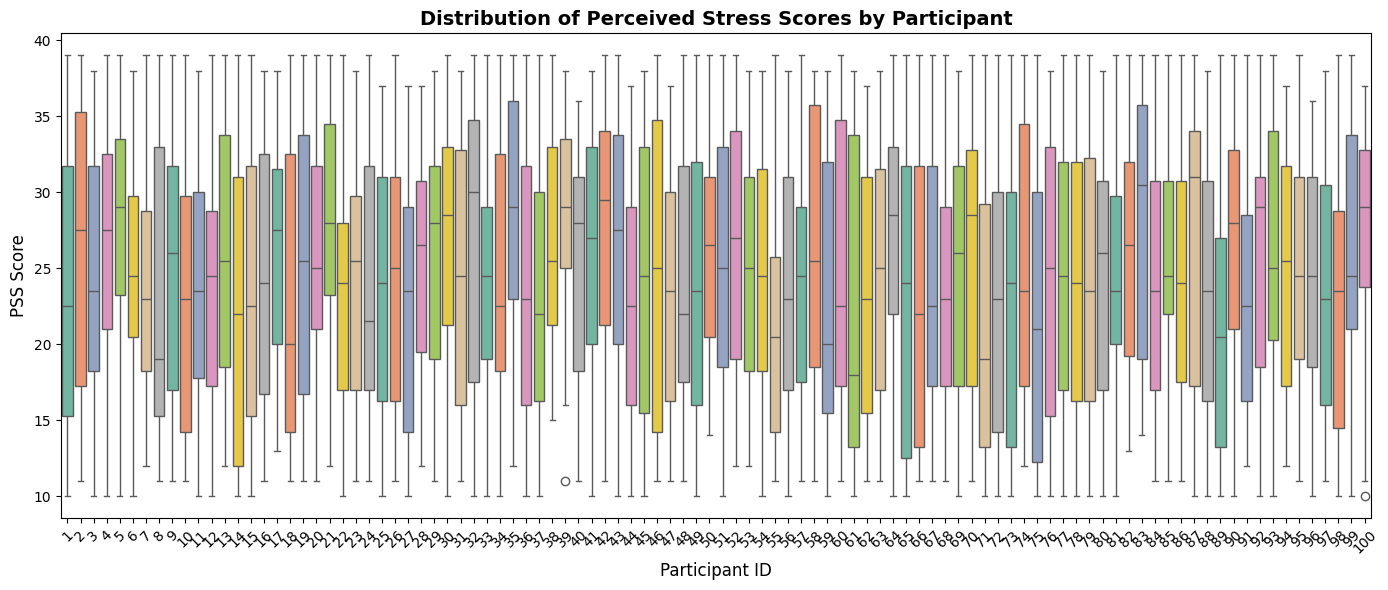

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("stress_detection.csv")

plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='participant_id', y='PSS_score', palette='Set2')
plt.title('Distribution of Perceived Stress Scores by Participant', fontsize=14, fontweight='bold')
plt.xlabel('Participant ID', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Assuming your data is loaded as 'df'
# df = pd.read_csv('your_data.csv')

# SELECT 4 RANDOM PARTICIPANTS (set seed for reproducibility)
np.random.seed(42)  # Change this number to get different random participants
all_participants = df['participant_id'].unique()
selected_participants = np.random.choice(all_participants, size=min(4, len(all_participants)), replace=False)
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

print("="*80)
print("SELECTED PARTICIPANTS FOR ANALYSIS:")
print("="*80)
for pid in selected_participants:
    n_obs = len(df_subset[df_subset['participant_id'] == pid])
    avg_stress = df_subset[df_subset['participant_id'] == pid]['PSS_score'].mean()
    print(f"Participant {pid}: {n_obs} observations, Avg PSS Score: {avg_stress:.2f}")
print("="*80)
print(f"\nTotal observations in subset: {len(df_subset)}")
print(f"Full dataset has {len(df)} observations from {len(all_participants)} participants")
print("="*80)
print("\n")

SELECTED PARTICIPANTS FOR ANALYSIS:
Participant 84: 30 observations, Avg PSS Score: 23.53
Participant 54: 30 observations, Avg PSS Score: 24.60
Participant 71: 30 observations, Avg PSS Score: 21.37
Participant 46: 30 observations, Avg PSS Score: 25.07

Total observations in subset: 120
Full dataset has 3000 observations from 100 participants




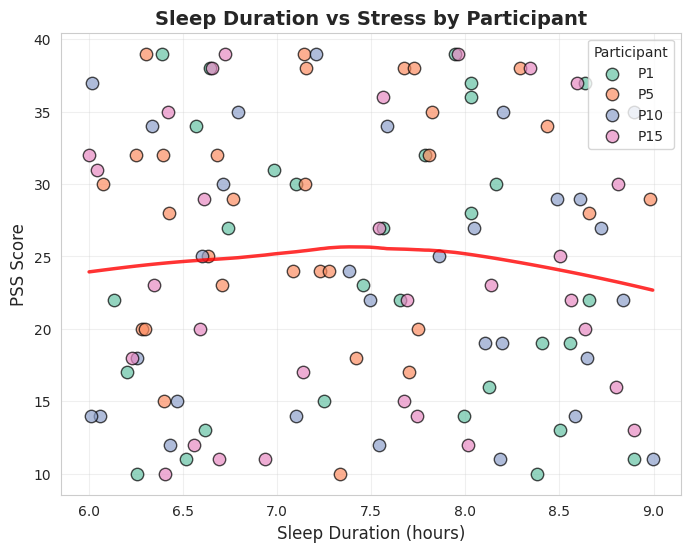

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("stress_detection.csv")

# --- Plot: Sleep Duration vs PSS ---
plt.figure(figsize=(8,6))

for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['sleep_duration'], subset['PSS_score'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

sns.regplot(
    data=df_subset,
    x='sleep_duration',
    y='PSS_score',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8}
)

plt.xlabel('Sleep Duration (hours)', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.title('Sleep Duration vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant')
plt.show()


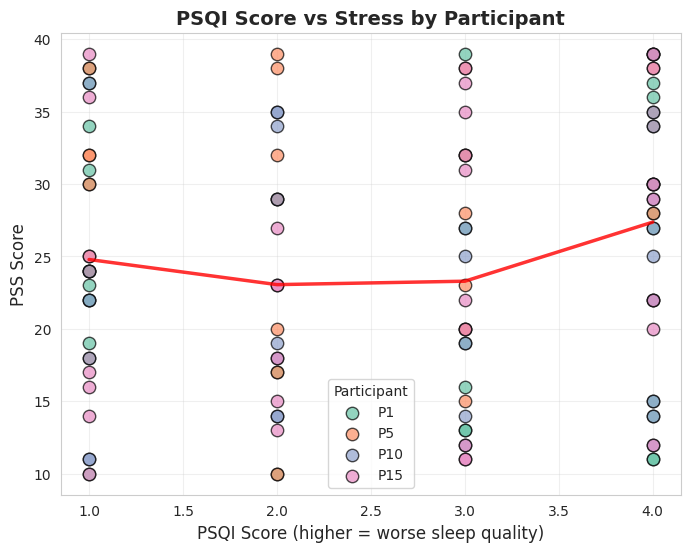

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("stress_detection.csv")

# --- Plot: PSQI Score vs PSS ---
plt.figure(figsize=(8,6))

for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['PSQI_score'], subset['PSS_score'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

sns.regplot(
    data=df_subset,
    x='PSQI_score',
    y='PSS_score',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8}
)

plt.xlabel('PSQI Score (higher = worse sleep quality)', fontsize=12)
plt.ylabel('PSS Score', fontsize=12)
plt.title('PSQI Score vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant')
plt.show()


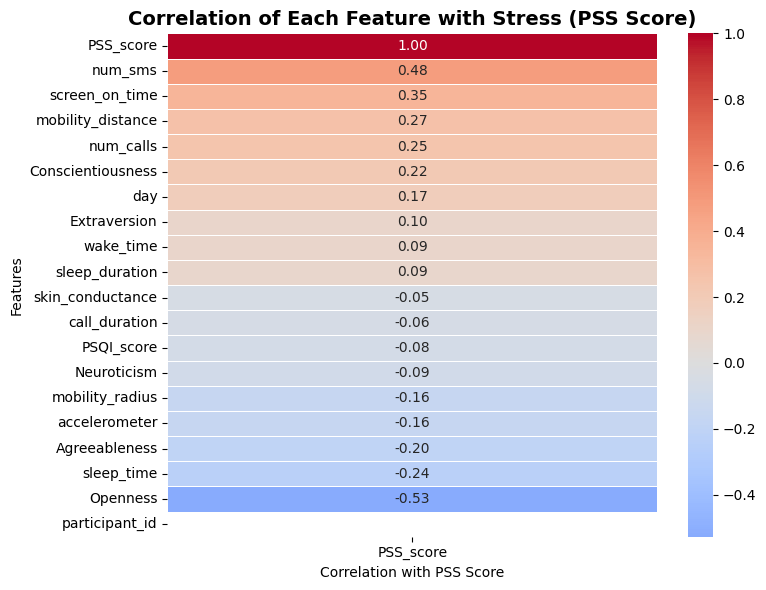

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Compute daily averages to smooth per-day variations
daily_stats = df.groupby('day').mean(numeric_only=True).reset_index()

# Calculate correlation matrix
corr = daily_stats.corr(method='spearman')

# Plot heatmap for only correlations with PSS_score
plt.figure(figsize=(8,6))
sns.heatmap(
    corr[['PSS_score']].sort_values(by='PSS_score', ascending=False),
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".2f",
    linewidths=0.5
)
plt.title('Correlation of Each Feature with Stress (PSS Score)', fontsize=14, fontweight='bold')
plt.ylabel('Features')
plt.xlabel('Correlation with PSS Score')
plt.tight_layout()
plt.show()


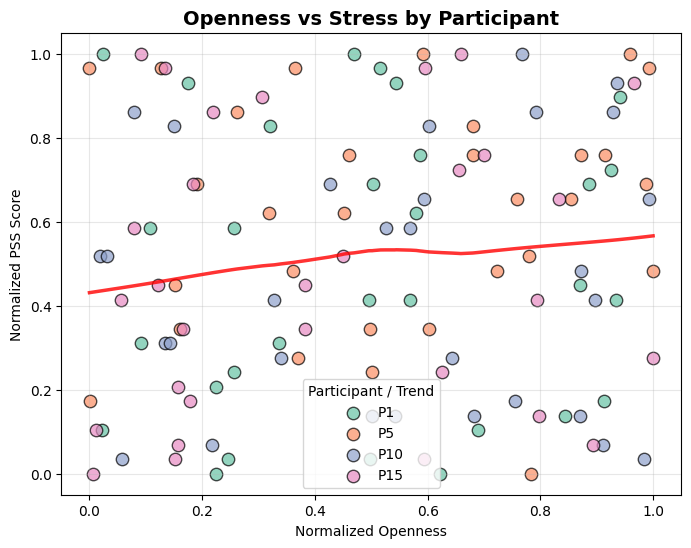

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize the columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['Openness_norm'] = normalize(df_subset['Openness'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot normalized Openness vs normalized PSS
plt.figure(figsize=(8,6))

# Scatter points per participant
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['Openness_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='Openness_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Openness')
plt.ylabel('Normalized PSS Score')
plt.title('Openness vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


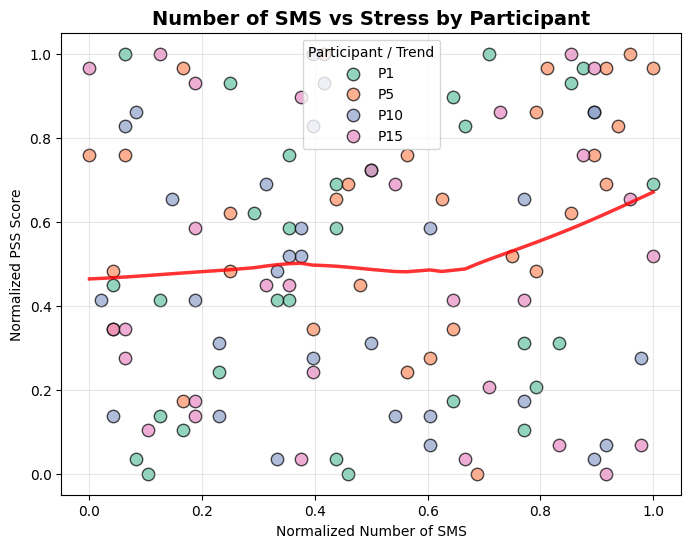

In [ ]:
# Normalize the columns
df_subset['num_sms_norm'] = (df_subset['num_sms'] - df_subset['num_sms'].min()) / (df_subset['num_sms'].max() - df_subset['num_sms'].min())
df_subset['PSS_norm'] = (df_subset['PSS_score'] - df_subset['PSS_score'].min()) / (df_subset['PSS_score'].max() - df_subset['PSS_score'].min())

# Plot normalized num_sms vs normalized PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['num_sms_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# Add LOWESS trend line
sns.regplot(
    data=df_subset,
    x='num_sms_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Number of SMS')
plt.ylabel('Normalized PSS Score')
plt.title('Number of SMS vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


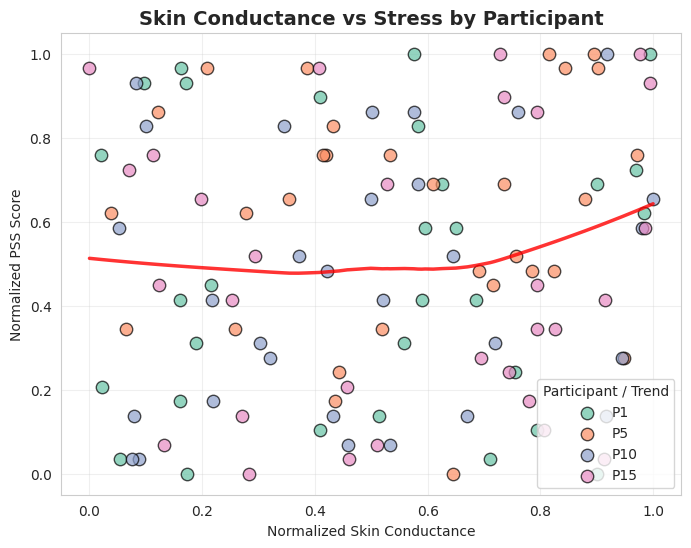

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("stress_detection.csv")

# Select subset of participants
selected_participants = [1, 5, 10, 15]
df_subset = df[df['participant_id'].isin(selected_participants)].copy()

# Assign colors for each participant
colors = sns.color_palette("Set2", len(selected_participants))
color_map = {pid: colors[idx] for idx, pid in enumerate(selected_participants)}
df_subset['color'] = df_subset['participant_id'].map(color_map)

# Normalize columns
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

df_subset['skin_norm'] = normalize(df_subset['skin_conductance'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])

# Plot Skin Conductance vs PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['skin_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# LOWESS trend line
sns.regplot(
    data=df_subset,
    x='skin_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Skin Conductance')
plt.ylabel('Normalized PSS Score')
plt.title('Skin Conductance vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


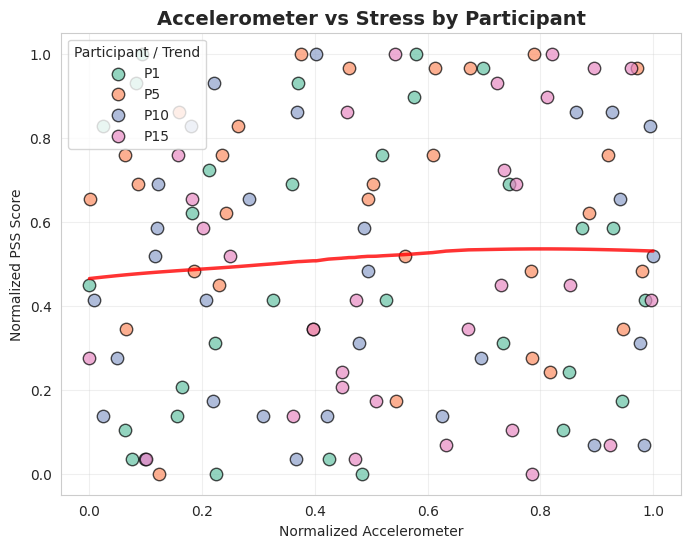

In [ ]:
# Normalize accelerometer
df_subset['accel_norm'] = normalize(df_subset['accelerometer'])
df_subset['PSS_norm'] = normalize(df_subset['PSS_score'])  # already normalized but safe to re-assign

# Plot Accelerometer vs PSS
plt.figure(figsize=(8,6))
for pid in selected_participants:
    subset = df_subset[df_subset['participant_id'] == pid]
    plt.scatter(subset['accel_norm'], subset['PSS_norm'],
                color=color_map[pid], s=80, alpha=0.7, edgecolor='black', label=f'P{pid}')

# LOWESS trend line
sns.regplot(
    data=df_subset,
    x='accel_norm',
    y='PSS_norm',
    scatter=False,
    lowess=True,
    line_kws={'color':'red', 'linewidth':2.5, 'alpha':0.8, 'label':'LOWESS Trend'}
)

plt.xlabel('Normalized Accelerometer')
plt.ylabel('Normalized PSS Score')
plt.title('Accelerometer vs Stress by Participant', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(title='Participant / Trend')
plt.show()


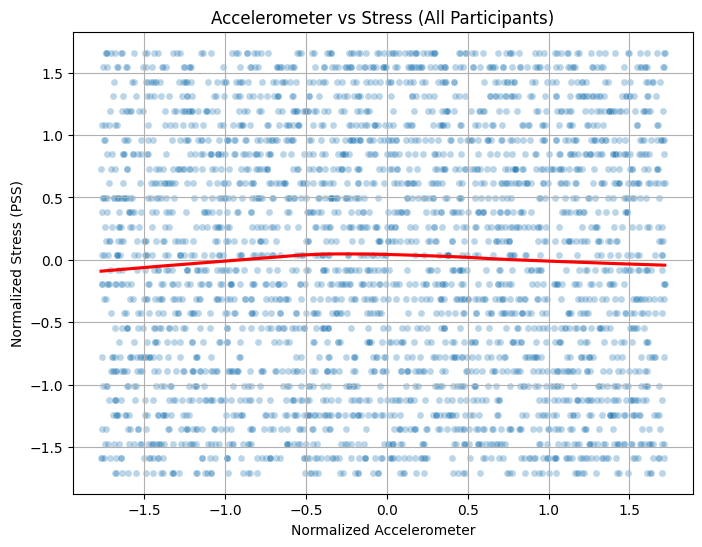

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is called `df`
# and it has columns: 'participant_id', 'accelerometer', 'pss'

# 1. Normalize features across all participants
scaler = StandardScaler()
df[['accel_norm', 'pss_norm']] = scaler.fit_transform(df[['accelerometer', 'PSS_score']])

# 2. Plot accelerometer vs stress for all participants
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='accel_norm', y='pss_norm', alpha=0.3, s=25)
sns.regplot(data=df, x='accel_norm', y='pss_norm', scatter=False, lowess=True, color='red')

plt.title("Accelerometer vs Stress (All Participants)")
plt.xlabel("Normalized Accelerometer")
plt.ylabel("Normalized Stress (PSS)")
plt.grid(True)
plt.show()


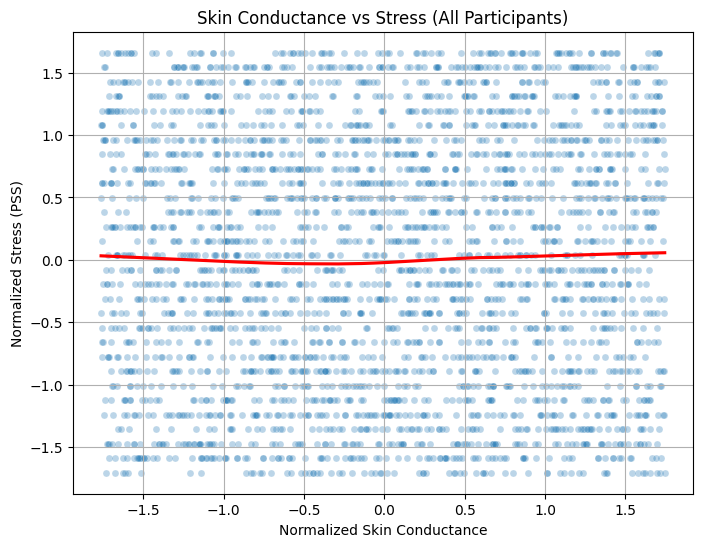

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Assuming your dataframe is called df and has columns:
# 'participant_id', 'skin_conductance', 'pss'

# 1. Normalize skin conductance and stress (across all participants)
scaler = StandardScaler()
df[['sc_norm', 'pss_norm']] = scaler.fit_transform(df[['skin_conductance', 'PSS_score']])

# 2. Plot scatter with LOWESS smoothing line
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sc_norm', y='pss_norm', alpha=0.3, s=25)
sns.regplot(
    data=df,
    x='sc_norm',
    y='pss_norm',
    scatter=False,
    lowess=True,
    color='red'
)

plt.title("Skin Conductance vs Stress (All Participants)")
plt.xlabel("Normalized Skin Conductance")
plt.ylabel("Normalized Stress (PSS)")
plt.grid(True)
plt.show()
